In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
data_path = './Data/'
train = pd.read_csv(data_path + 'final_train1.csv')

In [12]:
test = pd.read_csv(data_path + 'final_test1.csv')

In [3]:
print(train.keys())
print(train.shape)

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'artist_name', 'composer',
       'lyricist', 'language', 'city', 'bd', 'gender', 'registered_via',
       'expiration_date', 'membership_days', 'registration_year',
       'registration_month', 'registration_date', 'expiration_year',
       'expiration_month', 'count', 'AgeClass', 'year', 'country', 'genre',
       'genre_ids_count', 'lyricists_count', 'composer_count', 'is_featured',
       'artist_count', 'artist_composer', 'artist_composer_lyricist',
       'smaller_song', 'count_song_played', 'count_genre',
       'count_artist_played', 'count_composer_played',
       'count_lyricist_played'],
      dtype='object')
(7377418, 40)


In [4]:
L=['count','is_featured']

In [5]:
train = train.drop(L,axis=1)
print(train.keys())
print(train.shape)

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'artist_name', 'composer',
       'lyricist', 'language', 'city', 'bd', 'gender', 'registered_via',
       'expiration_date', 'membership_days', 'registration_year',
       'registration_month', 'registration_date', 'expiration_year',
       'expiration_month', 'AgeClass', 'year', 'country', 'genre',
       'genre_ids_count', 'lyricists_count', 'composer_count', 'artist_count',
       'artist_composer', 'artist_composer_lyricist', 'smaller_song',
       'count_song_played', 'count_genre', 'count_artist_played',
       'count_composer_played', 'count_lyricist_played'],
      dtype='object')
(7377418, 38)


In [7]:
#L =['count','gender','is_featured','smaller_song','artist_composer_lyricist','artist_count','artist_composer','AgeClass','genre_ids_count','lyricists_count']
L=['count','gender','smaller_song','artist_composer_lyricist','is_featured','artist_composer','artist_count','genre_ids_count','lyricists_count','composer_count']
#L=['count','gender','smaller_song','artist_composer_lyricist','is_featured','artist_composer','artist_count','genre_ids_count','lyricists_count','composer_count','AgeClass']
#L=['count']
train = train.drop(L,axis=1)
print(train.keys())
print(train.shape)

ValueError: labels ['count' 'gender' 'smaller_song' 'artist_composer_lyricist' 'is_featured'
 'artist_composer' 'artist_count' 'genre_ids_count' 'lyricists_count'
 'composer_count'] not contained in axis

In [9]:
test = test.drop(L,axis=1)
print(test.keys())
print(test.head(1))

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'artist_name', 'composer', 'lyricist',
       'language', 'city', 'bd', 'registered_via', 'expiration_date',
       'membership_days', 'registration_year', 'registration_month',
       'registration_date', 'expiration_year', 'expiration_month', 'AgeClass',
       'year', 'country', 'genre', 'count_song_played', 'count_genre',
       'count_artist_played', 'count_composer_played',
       'count_lyricist_played'],
      dtype='object')
                                           msno  \
0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   

    source_screen_name    source_type  song_length artist_name  \
0  Local playlist more  local-library     224130.0         梁文音   

         composer     lyricist  language          ...            \
0  Qi Zheng Zh

In [8]:
for col in train.columns:
    if train[col].dtype == object:
        train[col] = train[col].astype('category')
        #test[col] = test[col].astype('category')

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# For each KFold
for train_indices ,validate_indices in kf.split(train): 
    train_data = lgb.Dataset(train.drop(['target'],axis =1).loc[train_indices,:],label=train.loc[train_indices,'target'])
    val_data = lgb.Dataset(train.drop(['target'],axis =1).loc[validate_indices,:],label=train.loc[validate_indices,'target'])

In [10]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 150,
        'metric' : 'auc',
}

model_f1 = lgb.train(params, train_set=train_data,  valid_sets=val_data, verbose_eval=5)

/Users/huang/anaconda/lib/python3.6/site-packages/lightgbm/engine.py:98: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.649215
[10]	valid_0's auc: 0.655862
[15]	valid_0's auc: 0.65931
[20]	valid_0's auc: 0.661349
[25]	valid_0's auc: 0.66349
[30]	valid_0's auc: 0.665046
[35]	valid_0's auc: 0.666543
[40]	valid_0's auc: 0.66862
[45]	valid_0's auc: 0.670179
[50]	valid_0's auc: 0.671374
[55]	valid_0's auc: 0.672047
[60]	valid_0's auc: 0.673078
[65]	valid_0's auc: 0.673718
[70]	valid_0's auc: 0.674318
[75]	valid_0's auc: 0.674877
[80]	valid_0's auc: 0.675556
[85]	valid_0's auc: 0.676014
[90]	valid_0's auc: 0.676273
[95]	valid_0's auc: 0.676832
[100]	valid_0's auc: 0.677282
[105]	valid_0's auc: 0.677927
[110]	valid_0's auc: 0.678465
[115]	valid_0's auc: 0.678594
[120]	valid_0's auc: 0.678695
[125]	valid_0's auc: 0.679148
[130]	valid_0's auc: 0.679367
[135]	valid_0's auc: 0.679683
[140]	valid_0's auc: 0.680121
[145]	valid_0's auc: 0.680339
[150]	valid_0's auc: 0.68039


In [23]:
gain = model_f1.feature_importance("gain")
ft = pd.DataFrame({'feature':model_f1.feature_name(), 'split':model_f1.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
ft

,feature,gain,split
0,msno,44.322853,1853
4,source_type,22.358300,638
32,count_song_played,13.192087,1371
6,artist_name,6.543696,2475
3,source_screen_name,3.577896,728
1,song_id,2.035607,267
2,source_system_tab,1.568800,144
15,membership_days,1.055594,880
19,expiration_year,1.040838,68
7,composer,0.859523,529


In [3]:
import matplotlib.pyplot as plt

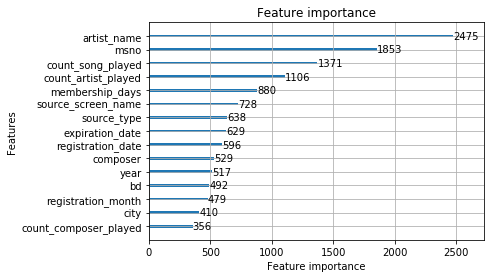

In [18]:
ax = lgb.plot_importance(model_f1,max_num_features=15,xlabel='Feature importance',ylabel='Features',importance_type="split")
#plt.figure(figsize=(30, 70), dpi=100)
plt.show()

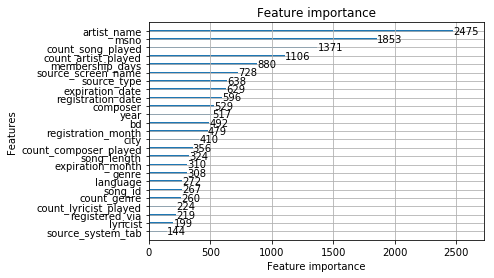

In [19]:
ax = lgb.plot_importance(model_f1,max_num_features=25,xlabel='Feature importance',ylabel='Features',importance_type="split")
#plt.figure(figsize=(30, 70), dpi=100)
plt.show()

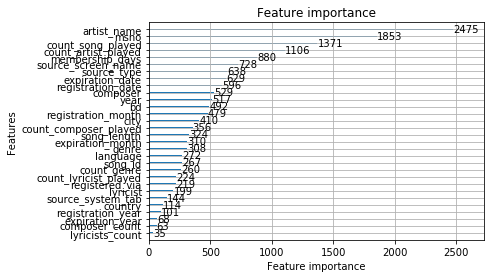

In [21]:
ax = lgb.plot_importance(model_f1,max_num_features=30,xlabel='Feature importance',ylabel='Features',importance_type="split")
#plt.figure(figsize=(30, 70), dpi=100)
plt.show()

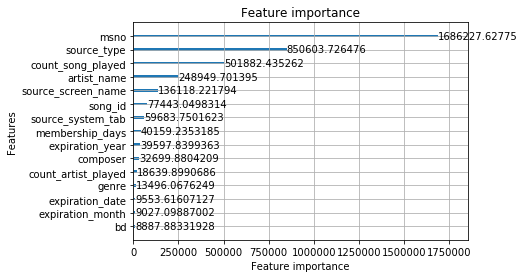

In [20]:
ax = lgb.plot_importance(model_f1,max_num_features=15,xlabel='Feature importance',ylabel='Features',importance_type="gain")
#plt.figure(figsize=(30, 70), dpi=100)
plt.show()

In [25]:
plt.figure()
ft[['feature','gain']].head(10).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(20, 30))
plt.gcf().savefig('features_importance3.png')

In [27]:
plt.figure()
ft[['feature','gain']].tail(10).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(20, 30))
plt.gcf().savefig('least_importance3.png')

In [11]:
gain = model_f1.feature_importance("gain")
ft = pd.DataFrame({'feature':model_f1.feature_name(), 'split':model_f1.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
ft


,feature,gain,split
0,msno,43.263911,1807
4,source_type,21.026079,597
24,count_song_played,13.183380,1327
6,artist_name,7.066831,2615
3,source_screen_name,4.240927,777
1,song_id,2.306746,336
2,source_system_tab,2.227476,124
18,expiration_year,1.028754,82
7,composer,0.974648,561
14,membership_days,0.957304,729


In [22]:
gain = model_f1.feature_importance("gain")
ft = pd.DataFrame({'feature':model_f1.feature_name(), 'split':model_f1.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
ft

,feature,gain,split
0,msno,43.330792,1782
4,source_type,17.559654,614
33,count_song_played,12.754218,1322
3,source_screen_name,8.896397,796
6,artist_name,6.939524,2485
1,song_id,2.106376,349
2,source_system_tab,1.508300,135
19,expiration_year,1.112501,95
15,membership_days,1.021319,794
7,composer,0.963223,542


In [34]:
gain = model_f1.feature_importance("gain")
ft = pd.DataFrame({'feature':model_f1.feature_name(), 'split':model_f1.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
ft

,feature,gain,split
0,msno,43.310675,1802
4,source_type,20.987639,582
24,count_song_played,13.166933,1402
6,artist_name,7.038981,2627
3,source_screen_name,4.272863,813
1,song_id,2.377831,369
2,source_system_tab,2.219532,130
18,expiration_year,1.053197,91
14,membership_days,0.925642,738
7,composer,0.891422,542


In [52]:
gain = model_f1.feature_importance("gain")
ft = pd.DataFrame({'feature':model_f1.feature_name(), 'split':model_f1.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
ft

,feature,gain,split
0,msno,42.712919,1751
4,source_type,22.143374,696
23,count_song_played,13.298679,1439
6,artist_name,6.962973,2508
3,source_screen_name,3.783530,740
1,song_id,2.506210,431
2,source_system_tab,1.639602,165
7,composer,1.175511,597
14,membership_days,1.083150,864
18,expiration_year,1.044416,96


In [26]:
import matplotlib.pyplot as plt
plt.figure()
ft[['feature','gain']].head(15).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(20, 30))
plt.gcf().savefig('features_importance2.png')


In [12]:
d = []
L = train.keys()
L2 = model_f1.feature_importance().tolist()
L = L.drop('target').tolist()
imp = pd.DataFrame({'features':L,'importance':L2})
# print(train.keys())
# print(model_f1.feature_importance())

In [14]:
imp.sort_values('importance',ascending=False)

,features,importance
6,artist_name,2615
0,msno,1807
24,count_song_played,1327
26,count_artist_played,1055
3,source_screen_name,777
14,membership_days,729
13,expiration_date,705
17,registration_date,650
4,source_type,597
7,composer,561


In [66]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'dart',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 150,
        'metric' : 'auc'
}

model_f2 = lgb.train(params, train_set=train_data,  valid_sets=val_data, verbose_eval=5)

/Users/huang/anaconda/lib/python3.6/site-packages/lightgbm/engine.py:98: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.649632
[10]	valid_0's auc: 0.654744
[15]	valid_0's auc: 0.657799
[20]	valid_0's auc: 0.66211
[25]	valid_0's auc: 0.663964
[30]	valid_0's auc: 0.666343
[35]	valid_0's auc: 0.66719
[40]	valid_0's auc: 0.668076
[45]	valid_0's auc: 0.668634
[50]	valid_0's auc: 0.668655
[55]	valid_0's auc: 0.669618
[60]	valid_0's auc: 0.67112
[65]	valid_0's auc: 0.671873
[70]	valid_0's auc: 0.673278
[75]	valid_0's auc: 0.673838
[80]	valid_0's auc: 0.674367
[85]	valid_0's auc: 0.674121
[90]	valid_0's auc: 0.674444
[95]	valid_0's auc: 0.674301
[100]	valid_0's auc: 0.674338
[105]	valid_0's auc: 0.674234
[110]	valid_0's auc: 0.67401
[115]	valid_0's auc: 0.674919
[120]	valid_0's auc: 0.675423
[125]	valid_0's auc: 0.675269
[130]	valid_0's auc: 0.676309
[135]	valid_0's auc: 0.676969
[140]	valid_0's auc: 0.676952
[145]	valid_0's auc: 0.677018
[150]	valid_0's auc: 0.677378


In [70]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'rf',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 1023,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 150,
        'metric' : 'auc'
}

model_f3 = lgb.train(params, train_set=train_data,  valid_sets=val_data, verbose_eval=5)

/Users/huang/anaconda/lib/python3.6/site-packages/lightgbm/engine.py:98: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.638994
[10]	valid_0's auc: 0.640617
[15]	valid_0's auc: 0.640524
[20]	valid_0's auc: 0.642072
[25]	valid_0's auc: 0.642413
[30]	valid_0's auc: 0.643073
[35]	valid_0's auc: 0.643413
[40]	valid_0's auc: 0.643129
[45]	valid_0's auc: 0.643048
[50]	valid_0's auc: 0.643047
[55]	valid_0's auc: 0.642996
[60]	valid_0's auc: 0.643286
[65]	valid_0's auc: 0.643181
[70]	valid_0's auc: 0.643297
[75]	valid_0's auc: 0.643441
[80]	valid_0's auc: 0.643563
[85]	valid_0's auc: 0.64351
[90]	valid_0's auc: 0.643474
[95]	valid_0's auc: 0.643376
[100]	valid_0's auc: 0.64333
[105]	valid_0's auc: 0.643403
[110]	valid_0's auc: 0.643378
[115]	valid_0's auc: 0.643341
[120]	valid_0's auc: 0.643388
[125]	valid_0's auc: 0.643412
[130]	valid_0's auc: 0.643445
[135]	valid_0's auc: 0.643414
[140]	valid_0's auc: 0.643369
[145]	valid_0's auc: 0.643452
[150]	valid_0's auc: 0.643549


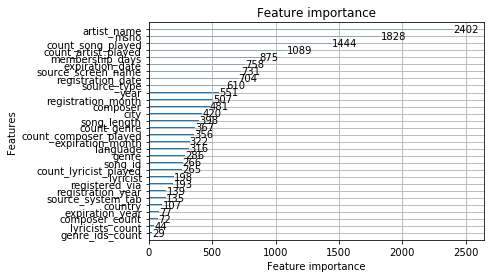

In [27]:
import matplotlib.pyplot as plt
ax = lgb.plot_importance(model_f1,max_num_features=30)
#plt.figure(figsize=(200,200))
plt.show()

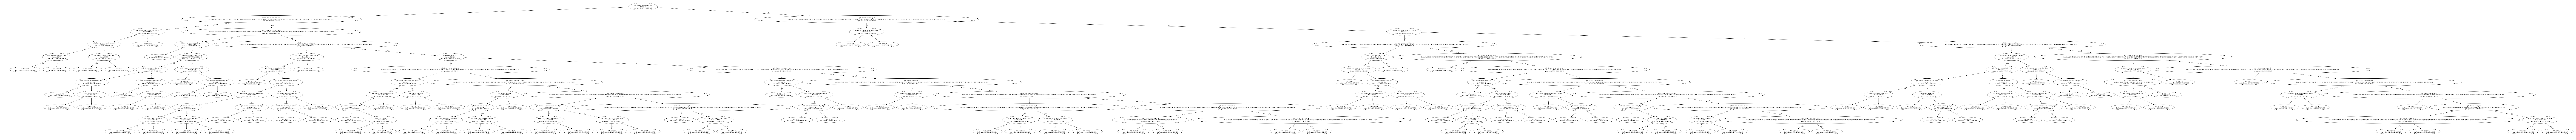

In [50]:
ax = lgb.plot_tree(model_f1,tree_index=83,figsize=(200,900),show_info=['split_gain'])
plt.show()

In [51]:
graph = lgb.create_tree_digraph(model_f1,tree_index=83,name="Tree84")
graph.render(view=True)

'Tree84.gv.pdf'

In [53]:
target = model_f1.predict(test)

In [54]:
t = np.asarray(target)
res = {}
res['target'] = t
df = pd.DataFrame(res)
df.to_csv('result21.csv', sep=',')